# Python for Engineers Assignment 2018
Answer all questions.
<br>すべての質問に答えなさい。

Submission deadline 07/16 (July 16).
<br>提出締め切り07/16 (7月16日）。

Please submit your answer by email.
<br>どうぞ、メールによってあなたの答えを提出してください。

You may use the following file formats:
<br>あなたは以下のファイル形式を使ってもよい:
- .py
- .ipynb
- .txt

You may use multiple files.
<br>あなたは複数のファイルを使ってもよい。

You will be awarded points for:
あなたは以下のためのポイントを授与される：
- correct solution. 正しい答え。
- concise solution. 簡潔な答え。
- optimising your code by importing relevant library functions. 外部や基準のライブラリやパッケージを利用します。
- writing functions to avoid repetition. 重複を防ぐために関数（functions)を使いなさい。
- using comments to explain what your code does. あなたのコードを説明するために、コメントを用いる。

## Part A : Data Analysis　データ分析

#### Question 1
*(2 marks)*<br>
Import the data from the url to a Pandas data frame:
<br>`Pandas`を使って、以下urlからデータを読み込めよ
<br>https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user


In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
#Import the data
data = pd.read_csv(url, sep = '|')
#Check if I could import the data
print(data)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librarian    02138
19        20   42   

#### Question 2
*(2 marks)*<br>
Remove all entries with occupation `other` or `retired` from the data set.
<br>職業`occupation`の中に`other`と`retired`に関連するデータを取り除く。



In [2]:
A = data.index[(data.occupation == 'other')] 
B = data.index[(data.occupation == 'retired')]
#remove all entries with occupation 'other'
data.drop(index = A.tolist(),inplace = True)
#remove all entries with occupation 'retired'
data.drop(index = B.tolist(),inplace =True)
print(data)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
2          3   23      M         writer    32067
3          4   24      M     technician    43537
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
18        19   40      M      librarian    02138
19        20   42      F      homemaker    95660
20        21   26      M         writer    30068
21        22   25      M         writer    40206
22        23   30      F         artist    48197
23        24   21      F         artist    94533
24        25   39   

#### Question 3
*(6 marks)*<br>
Plot a bar chart showing:
<br>棒グラフをプロットしなさい：
- the number of people per occupation for the 10 occupations that occur most frequently in the data set.
<br>取り除かない各職業の総人数を計算し、総人数最も多い10つの職業を取り出し、各職業の総人数を棒グラフで書きなさい。
- plot an additional bar, labelled other, showing the sum of all remaining entries in the data set.
<br>その以外の職業の人数をまとめて、`other`という名前を付け、同じ棒グラフに書きなさい。



In [3]:
import matplotlib.pyplot as plt
import numpy as np
#check what kinds of occupation there are in the data
A1 = data.drop_duplicates("occupation")
#make a list of the number of each occupation
new_list = []
for raw in A1["occupation"]:
    A = len(data[data['occupation'] == raw]['occupation'])
    new_list.append(A)

#make a list of all occupations 
B = list(A1['occupation'])
#make an array of occupations and the number
B1 = np.array([B,new_list])
#rearrange the array in descending order
B2 = B1[:, np.argsort(new_list)[::-1]]
#make a list of 10 occupations and 'other'
C1 = B2[:,:10]
P = list(C1[0])
P.append('other')
#make a list of the number of 11 occupations 
C2 = B2[:,10:]
D1 = list(map(int,C2[1]))
Q = list(map(int,C1[1]))
Q.append(sum(D1))

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(P))
# Produce bar plot
plt.bar(x_pos, Q);

# Replace the x ticks with P
# Rotate labels 90 degrees
plt.xticks(x_pos, P, rotation=90);
# Add axis labels 
plt.xlabel('occupation');
plt.ylabel('number of people');


#### Question 4
*(2 marks)*<br>
Find the:
- mean 
- standard deviaion 

of the age of people with the occupation: `administrator`.

<br>`administrator`という職業`occupation`の人達を見つけ出す。その人達の年齢の
- 平均値
- 標準偏差

を求めよ。

In [4]:
#make a data of only administrator
for raw in data["occupation"]:
    P = data[data['occupation'] == "administrator"]
#find the mean
print(P.iloc[:, 1].mean())
#find the standard deviation
print(P.iloc[:, 1].std())

38.74683544303797
11.123396864533204


## Part B : Movement of a Particle 粒子の動き

A particle moves along a curve.
<br>粒子がある軌跡を沿って移動する。

The cartesian coordinates of the position of the particle $(r_x, r_y)$ are: 
<br>粒子の位置$（r_x、r_y）$は時間$t$の変数である。その式は以下：

\begin{align}
r_x &= \exp \left( -\dfrac{t}{T_1} \right) 
\\
r_y &= 2 \cos \left(\dfrac{t}{T_2}\right)
\end{align}

$t$ = time (s)

Constants:　その中に、$T$は定数
<br>$T_1 = 1$ s 
<br>$T_2 = 1/3$ s. 

#### Question 1
*(8 marks)*

Plot the trajectory of the particle in the $xy$-plane over the time interval $t = 0$ to $t = 2\pi$ s. 
<br>時間$t=0$から$t=2\pi$までの粒子の軌跡を書きなさい。軌跡を表す点の数は任意。

On the graph, show the particle’s locations at $t = 0$, $\pi/2$ and $2\pi$ using:
<br>同じ図に、以下のものを使って、$t=0$、$t=\pi／2$と$t=2\pi$の粒子の位置を強調せよ：
- a marker 
- a label 



Text(0,0.5,'ry')

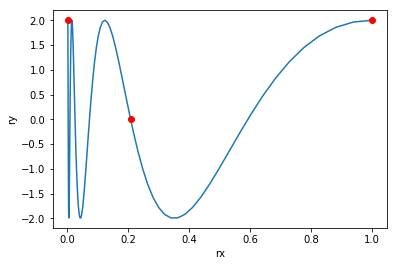

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#define the constants
e = np.e
T1 = 1
T2 = 1/3
# define the functions
def rx(t):
    return e**(-t/T1)
def ry(t) :
    return 2*np.cos(t/T2)
#define the time span
tspan = np.linspace(0,2*np.pi,100)
#plotting
plt.plot(rx(tspan),ry(tspan),label='the trajectory of the particle')
#plot the point of particle locations at t=0,pi/2,and 2*pi
plt.plot(rx(0),ry(0),'ro')
plt.plot(rx(np.pi/2),ry(np.pi/2),'ro')
plt.plot(rx(2*np.pi),ry(2*np.pi),'ro')
## Axes labels
plt.xlabel('rx')
plt.ylabel('ry')

#### Question 2

The $x$ and $y$ components of the particle's acceleration $(a_x, a_y)$:
<br>粒子の加速度$（a_x、a_y）$はの粒子の位置$（r_x、r_y）$の二階微分である：

$$a_x=v_x'=r_x''$$
$$a_y=v_y'=r_y''$$ 

velocity $(v_x, v_y)$
<br>速度$(v_x, v_y)$

__(a)__ Express the particles acceleration $(a_x、a_y)$ symbolically, i.e. show the equation. 
<br>粒子加速度$（a_x、a_y）$を計算せよ。方程式を示す。
<br>*(5 marks)*<br>




In [6]:
from sympy import diff,symbols,Symbol
import sympy as sp
#define t
t = Symbol('t')
#difine the functions again 
def ry(t) :
    return 2*sp.cos(t/T2)
def ax(t):
    return diff(rx(t), t, 2)
def ay(t):
    return diff(ry(t),t,2)

print('ax =',ax(t))
print('ay =',ay(t))

ax = 1.0*2.71828182845905**(-t)
ay = -18.0*cos(3.0*t)


__(b)__ Plot the *magnitude* of the acceleration of the particle against time over the time interval $t = 0$ to $t = 2\pi$ s.
<br>時間$t=0$から$t=2\pi$までの粒子の加速度の絶対値（マグニチュード加速度）を計算し、時間$t$に対する図を書きなさい。つまり、X軸は時間$t$、Y軸は加速度の絶対値。絶対値の式は以下
<br>*(5 marks)*<br>

The magnitude of acceleration, $A$:
$$A = \sqrt{a_x^2 + a_y^2}$$



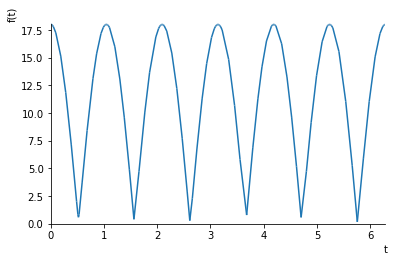

In [7]:
#define the function
def A(t):
    return sp.sqrt(ax(t)**2 + ay(t)**2)
#plotting
sp.plot(A(t), (t, 0, 2*sp.pi))

##### Question 3
__(a)__
Find the magnitude velocity of the particle at time $ t = 1$s.
<br>$t=1$時刻の粒子の速度の絶対値（マグニチュード速度）を見つけ出す。
<br>*(5 marks)*<br>

In [8]:
print(A(t).subs(t,1))

17.8236618493674


__(b)__
Estimate the time/times when $r_y=0$
<br>$r_y=0$を満足する時間（時間達）を逆計算せよ。
<br>*(5 marks)*<br>

In [9]:
from sympy import solve
solution = solve(ry(t),t)
print(solution)

[0.523598775598299, 1.57079632679490]


#### Question 4 
*(10 marks)*<br>
Animate the trajectory of the particle and save your work as a .mp4 file.
<br>粒子の移動軌跡をアニメーション化し、.mp4ファイルとして保存しなさい。

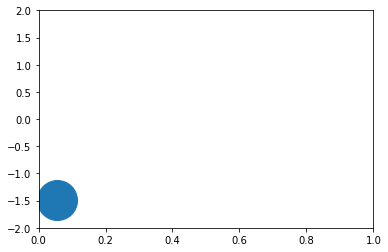

In [10]:
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")        
from ipywidgets import interact

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Creates a figure window.
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(0, 1), ylim=(-2,2))

# Object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  # for points

e =np.e
T1 = 1
T2 = 1/3

# Position of mass as function of time
def fun(s):
    x = e**(-s/T1)
    y =2*np.cos(s/T2)
    return x, y

def animate(i):   
    x, y = fun(i/10)   
    point.set_data(x, y)    
    return  (point,)
    
# Animates the data
anim = animation.FuncAnimation(fig, animate, frames=30, interval=50, blit=True)

anim
writer = animation.writers['ffmpeg'](fps=15,bitrate=1800)
anim.save('the_trajectory_of_the_particle.mp4',writer = writer)